In [41]:
import pandas as pd
df1 = pd.read_csv('hot_rolled_spread.csv')
df2 = pd.read_csv('pmi.csv')
df3 = pd.read_csv('bituminous_cola_avg.csv')

,year,month,date,index,index_moving_avg,index_moving_short_avg,signal
0,2013,1,2013-01-01,-0.324784,-0.324784,-0.324784,0.0
1,2013,2,2013-02-01,-0.266207,-0.295495,-0.266207,1.0
2,2013,3,2013-03-01,-0.226124,-0.272371,-0.226124,1.0
3,2013,4,2013-04-01,-0.239901,-0.264254,-0.239901,1.0
4,2013,5,2013-05-01,-0.283649,-0.268133,-0.283649,0.0
...,...,...,...,...,...,...,...
124,2023,5,2023-05-01,0.858058,1.328683,0.858058,0.0
125,2023,6,2023-06-01,0.520391,1.202941,0.520391,0.0
126,2023,7,2023-07-01,0.170801,1.085113,0.170801,0.0
127,2023,8,2023-08-01,0.238878,1.018202,0.238878,0.0


In [26]:
import yfinance as yf

# 각 회사의 ticker symbol을 설정
symbols = ['X', '601857.SS', '5401.T', 'MT', 'TKA.DE']

# 각 ticker symbol에 대해 주가 데이터를 가져옴
for symbol in symbols:
    data = yf.download(symbol, start='2021-01-01', end='2023-12-30')  # start와 end는 원하는 기간을 설정
    print(f"\n{symbol} stock data:")
    print(data)

[*********************100%%**********************]  1 of 1 completed

X stock data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-01-04  17.240000  17.650000  16.860001  17.139999  16.802887  11577300
2021-01-05  17.120001  18.730000  17.070000  18.200001  17.842039  16848200
2021-01-06  18.740000  21.830000  18.570000  21.320000  20.900671  36743200
2021-01-07  21.670000  22.420000  20.150000  20.450001  20.047785  25312300
2021-01-08  21.340000  23.280001  20.950001  22.290001  21.851597  27600000
...               ...        ...        ...        ...        ...       ...
2023-12-22  47.950001  48.090000  47.810001  47.970001  47.970001   5028700
2023-12-26  47.830002  48.430000  47.820000  48.349998  48.349998   4833400
2023-12-27  48.299999  48.730000  48.290001  48.610001  48.610001   3281200
2023-12-28  48.610001  48.840000  48.560001  48.660000  48.660000   3691700
2023

In [28]:
United = yf.download('X', start = '2013-01-01', end = '2023-09-30')
Baowu = yf.download('601857.SS', start = '2013-01-01', end = '2023-09-30')
Nippon = yf.download('5401.T', start = '2013-01-01', end = '2023-09-30')
ArcelorMittal = yf.download("MT", start = '2013-01-01', end = '2023-09-30')
Thyssenkrupp = yf.download('TKA.DE', start = '2013-01-01', end = '2023-09-30')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [31]:
df_europe = ArcelorMittal[['Close']]
    
df_europe.index = pd.to_datetime(df_europe.index)
    
df_europe_first_day = df_europe.groupby([df_europe.index.year, df_europe.index.month]).first()
    
df_europe_first_day = df_europe_first_day.head(129)
    
    # 첫 번째 데이터프레임의 인덱스를 United기존 인덱스는 삭제
df_europe_first_day = df_europe_first_day.reset_index(drop=True)

print(df_europe_first_day)

         Close
0    53.549999
1    52.410000
2    43.560001
3    38.340000
4    36.869999
..         ...
124  28.059999
125  25.559999
126  27.250000
127  28.510000
128  27.000000

[129 rows x 1 columns]


In [54]:
df_ger = Thyssenkrupp[['Close']]
    
df_ger.index = pd.to_datetime(df_ger.index)
    
df_ger_first_day = df_ger.groupby([df_ger.index.year, df_ger.index.month]).first()
    
df_ger_first_day = df_ger_first_day.head(129)
    
    # 첫 번째 데이터프레임의 인덱스를 United기존 인덱스는 삭제
df_ger_first_day = df_ger_first_day.reset_index(drop=True)

print(df_ger_first_day)

         Close
0    18.639999
1    18.299999
2    16.764999
3    15.630000
4    13.385000
..         ...
124   6.440000
125   6.818000
126   7.206000
127   7.064000
128   7.370000

[129 rows x 1 columns]


### 포스코 주가 가중치 구하기

In [74]:
import numpy as np

# Create a list from 0.1 to 0.8 with step 0.1
weights = np.arange(0.1, 0.9, 0.1)
number = 0

# average_asset_diff 값을 저장할 딕셔너리를 생성
average_asset_diff_dict = {}


# Iterate over all combinations of A, B, and C
for A in weights:
    for B in weights:
        for C in weights:
            if np.isclose(A + B + C, 1.0, rtol=1e-05, atol=1e-08):  # Check if the sum of A, B, C is close to 1
                number += 1
                
                df_calcu_index = df_index
                df_calcu_index['index'] = A*df1['value'] + B*df2['value'] + C*df3['value']
                
                # 'index' 열에 대해 2년 이동 평균을 계산합니다.
                # min_periods=1로 설정하여 처음 2년 동안에도 이동 평균을 계산합니다.
                df_calcu_index['index_moving_avg'] = df_calcu_index['index'].rolling(window=12, min_periods=1).mean()
                df_calcu_index['index_moving_short_avg'] = df_calcu_index['index'].rolling(window=1, min_periods=1).mean()
                
                df_calcu_index['signal'] = np.where(df_calcu_index['index_moving_short_avg'] > df_calcu_index['index_moving_avg'], 1.0, 0.0) # 1.0이 매수를 의미함
                
                df_combined = pd.concat([df_calcu_index, posco_close_first_day], axis=1)
                
                # 매수/매도에 따른 자산 변화를 저장할 리스트
                asset_diff_list = []

# 매수 상태를 나타내는 변수 (매수하면 True, 매도하면 False)
                buy_flag = False

# 매수한 가격을 저장하는 변수
                buy_price = 0
                
                for i, row in df_combined.iterrows():
                    # 매수 신호가 나왔고, 아직 매수하지 않은 상태라면 매수를 진행
                    if row['signal'] == 1.0 and not buy_flag:
                        buy_flag = True
                        buy_price = row['Close']
                        asset_diff_list.append(0) 
                    # 매도 신호가 나왔고, 매수한 상태라면 매도를 진행 
                    elif row['signal'] == 0.0 and buy_flag:
                        buy_flag = False
                        price_diff = row['Close'] - buy_price
                        asset_diff_list.append(price_diff)
                    # 매수 상태면서 매도 신호가 아직 오지 않았다면, 가격 변화를 계산해서 추가
                    elif buy_flag and row['signal'] != 0.0:
                        price_diff = row['Close'] - buy_price
                        asset_diff_list.append(price_diff)
                        
                    # 매수 상태가 아니라면 가격 변화가 없으므로 이전 값을 그대로 사용
                    else:
                        asset_diff_list.append(asset_diff_list[-1] if asset_diff_list else 0)
                        
                df_combined['asset_diff'] = asset_diff_list
                
                last_10_rows = df_combined.tail(10)
                
                average_asset_diff = last_10_rows['asset_diff'].mean()
                
                # average_asset_diff 값을 딕셔너리에 추가
                # (A, B, C)를 키로 사용하고 average_asset_diff를 값으로 사용
                average_asset_diff_dict[(A, B, C)] = average_asset_diff


In [75]:
# average_asset_diff_dict의 키 값을 반올림
rounded_keys_average_asset_diff_dict = {(round(A, 1), round(B, 1), round(C, 1)): v for (A, B, C), v in average_asset_diff_dict.items()}


sorted_dict = sorted(rounded_keys_average_asset_diff_dict.items(), key=lambda x: x[1], reverse=True)

# 상위 10개만 추출
top_10_items = sorted_dict[:10]

for item in top_10_items:
    print(item)

((0.1, 0.6, 0.3), 78600.0)
((0.2, 0.6, 0.2), 78600.0)
((0.3, 0.6, 0.1), 78600.0)
((0.1, 0.7, 0.2), 66600.0)
((0.1, 0.8, 0.1), 66600.0)
((0.2, 0.7, 0.1), 66600.0)
((0.1, 0.2, 0.7), 63000.0)
((0.1, 0.5, 0.4), 56750.0)
((0.2, 0.5, 0.3), 56750.0)
((0.3, 0.4, 0.3), 56750.0)


### 유럽 회사 주가 가중치 구하기

In [58]:
import numpy as np

# Create a list from 0.1 to 0.8 with step 0.1
weights = np.arange(0.1, 0.9, 0.1)
number = 0

# average_asset_diff 값을 저장할 딕셔너리를 생성
average_asset_diff_dict = {}


# Iterate over all combinations of A, B, and C
for A in weights:
    for B in weights:
        for C in weights:
            if np.isclose(A + B + C, 1.0, rtol=1e-05, atol=1e-08):  # Check if the sum of A, B, C is close to 1
                number += 1
                df_calcu_index = df_index
                df_calcu_index['index'] = A*df1['value'] + B*df2['value'] + C*df3['value']
                
                # 'index' 열에 대해 2년 이동 평균을 계산합니다.
                # min_periods=1로 설정하여 처음 2년 동안에도 이동 평균을 계산합니다.
                df_calcu_index['index_moving_avg'] = df_calcu_index['index'].rolling(window=12, min_periods=1).mean()
                df_calcu_index['index_moving_short_avg'] = df_calcu_index['index'].rolling(window=1, min_periods=1).mean()
                
                df_calcu_index['signal'] = np.where(df_calcu_index['index_moving_short_avg'] > df_calcu_index['index_moving_avg'], 1.0, 0.0) # 1.0이 매수를 의미함
                
                df_combined = pd.concat([df_calcu_index, df_europe_first_day], axis=1)
                
                # 매수/매도에 따른 자산 변화를 저장할 리스트
                asset_diff_list = []

# 매수 상태를 나타내는 변수 (매수하면 True, 매도하면 False)
                buy_flag = False

# 매수한 가격을 저장하는 변수
                buy_price = 0
                
                for i, row in df_combined.iterrows():
                    # 매수 신호가 나왔고, 아직 매수하지 않은 상태라면 매수를 진행
                    if row['signal'] == 1.0 and not buy_flag:
                        buy_flag = True
                        buy_price = row['Close']
                        asset_diff_list.append(0) 
                    # 매도 신호가 나왔고, 매수한 상태라면 매도를 진행 
                    elif row['signal'] == 0.0 and buy_flag:
                        buy_flag = False
                        price_diff = row['Close'] - buy_price
                        asset_diff_list.append(price_diff)
                    # 매수 상태면서 매도 신호가 아직 오지 않았다면, 가격 변화를 계산해서 추가
                    elif buy_flag and row['signal'] != 0.0:
                        price_diff = row['Close'] - buy_price
                        asset_diff_list.append(price_diff)
                        
                    # 매수 상태가 아니라면 가격 변화가 없으므로 이전 값을 그대로 사용
                    else:
                        asset_diff_list.append(asset_diff_list[-1] if asset_diff_list else 0)
                        
                df_combined['asset_diff'] = asset_diff_list
                
                last_10_rows = df_combined.tail(10)
                
                average_asset_diff = last_10_rows['asset_diff'].mean()
                
                # average_asset_diff 값을 딕셔너리에 추가
                # (A, B, C)를 키로 사용하고 average_asset_diff를 값으로 사용
                average_asset_diff_dict[(A, B, C)] = average_asset_diff


In [59]:
# average_asset_diff_dict의 키 값을 반올림
rounded_keys_average_asset_diff_dict = {(round(A, 1), round(B, 1), round(C, 1)): v for (A, B, C), v in average_asset_diff_dict.items()}


sorted_dict = sorted(rounded_keys_average_asset_diff_dict.items(), key=lambda x: x[1], reverse=True)

# 상위 10개만 추출
top_10_items = sorted_dict[:10]

for item in top_10_items:
    print(item)

((0.1, 0.1, 0.8), 9.039999961853027)
((0.1, 0.2, 0.7), 8.139999389648438)
((0.1, 0.6, 0.3), 2.418000602722168)
((0.2, 0.6, 0.2), 2.418000602722168)
((0.3, 0.6, 0.1), 2.418000602722168)
((0.1, 0.7, 0.2), 2.149000549316406)
((0.1, 0.8, 0.1), 2.149000549316406)
((0.2, 0.7, 0.1), 2.149000549316406)
((0.6, 0.1, 0.3), 1.5799999237060547)
((0.6, 0.2, 0.2), 1.5799999237060547)


### 독일 회사 가중치 구하기

In [60]:
import numpy as np

# Create a list from 0.1 to 0.8 with step 0.1
weights = np.arange(0.1, 0.9, 0.1)
number = 0

# average_asset_diff 값을 저장할 딕셔너리를 생성
average_asset_diff_dict = {}


# Iterate over all combinations of A, B, and C
for A in weights:
    for B in weights:
        for C in weights:
            if np.isclose(A + B + C, 1.0, rtol=1e-05, atol=1e-08):  # Check if the sum of A, B, C is close to 1
                number += 1
                df_calcu_index = df_index
                df_calcu_index['index'] = A*df1['value'] + B*df2['value'] + C*df3['value']
                
                # 'index' 열에 대해 2년 이동 평균을 계산합니다.
                # min_periods=1로 설정하여 처음 2년 동안에도 이동 평균을 계산합니다.
                df_calcu_index['index_moving_avg'] = df_calcu_index['index'].rolling(window=12, min_periods=1).mean()
                df_calcu_index['index_moving_short_avg'] = df_calcu_index['index'].rolling(window=1, min_periods=1).mean()
                
                df_calcu_index['signal'] = np.where(df_calcu_index['index_moving_short_avg'] > df_calcu_index['index_moving_avg'], 1.0, 0.0) # 1.0이 매수를 의미함
                
                df_combined = pd.concat([df_calcu_index, df_ger_first_day], axis=1)
                
                # 매수/매도에 따른 자산 변화를 저장할 리스트
                asset_diff_list = []

# 매수 상태를 나타내는 변수 (매수하면 True, 매도하면 False)
                buy_flag = False

# 매수한 가격을 저장하는 변수
                buy_price = 0
                
                for i, row in df_combined.iterrows():
                    # 매수 신호가 나왔고, 아직 매수하지 않은 상태라면 매수를 진행
                    if row['signal'] == 1.0 and not buy_flag:
                        buy_flag = True
                        buy_price = row['Close']
                        asset_diff_list.append(0) 
                    # 매도 신호가 나왔고, 매수한 상태라면 매도를 진행 
                    elif row['signal'] == 0.0 and buy_flag:
                        buy_flag = False
                        price_diff = row['Close'] - buy_price
                        asset_diff_list.append(price_diff)
                    # 매수 상태면서 매도 신호가 아직 오지 않았다면, 가격 변화를 계산해서 추가
                    elif buy_flag and row['signal'] != 0.0:
                        price_diff = row['Close'] - buy_price
                        asset_diff_list.append(price_diff)
                        
                    # 매수 상태가 아니라면 가격 변화가 없으므로 이전 값을 그대로 사용
                    else:
                        asset_diff_list.append(asset_diff_list[-1] if asset_diff_list else 0)
                        
                df_combined['asset_diff'] = asset_diff_list
                
                last_10_rows = df_combined.tail(10)
                
                average_asset_diff = last_10_rows['asset_diff'].mean()
                
                # average_asset_diff 값을 딕셔너리에 추가
                # (A, B, C)를 키로 사용하고 average_asset_diff를 값으로 사용
                average_asset_diff_dict[(A, B, C)] = average_asset_diff


In [61]:
# average_asset_diff_dict의 키 값을 반올림
rounded_keys_average_asset_diff_dict = {(round(A, 1), round(B, 1), round(C, 1)): v for (A, B, C), v in average_asset_diff_dict.items()}


sorted_dict = sorted(rounded_keys_average_asset_diff_dict.items(), key=lambda x: x[1], reverse=True)

# 상위 10개만 추출
top_10_items = sorted_dict[:10]

for item in top_10_items:
    print(item)

((0.1, 0.1, 0.8), 1.2059998512268066)
((0.6, 0.1, 0.3), 0.754000186920166)
((0.6, 0.2, 0.2), 0.754000186920166)
((0.7, 0.1, 0.2), 0.754000186920166)
((0.7, 0.2, 0.1), 0.754000186920166)
((0.8, 0.1, 0.1), 0.754000186920166)
((0.1, 0.6, 0.3), 0.6439999580383301)
((0.2, 0.6, 0.2), 0.6439999580383301)
((0.3, 0.6, 0.1), 0.6439999580383301)
((0.1, 0.7, 0.2), 0.5703999519348144)


In [ ]:
df_index = df1
df_index['index'] = df1['value'] + df2['value'] + df3['value']
df_index = df_index.drop('value', axis = 1)

In [ ]:
import numpy as np

# Create a list from 0.1 to 0.8 with step 0.1
weights = np.arange(0.1, 0.9, 0.1)
number = 0

# Iterate over all combinations of A, B, and C
for A in weights:
    for B in weights:
        for C in weights:
            if np.isclose(A + B + C, 1.0, rtol=1e-05, atol=1e-08):  # Check if the sum of A, B, C is close to 1
                number += 1
                df_index = df1
                df_index['index'] = A*df1['value'] + B*df2['value'] + C*df3['value']
                df_index = df_index.drop('value', axis = 1)
                
                # 'index' 열에 대해 2년 이동 평균을 계산합니다.
                # min_periods=1로 설정하여 처음 2년 동안에도 이동 평균을 계산합니다.
                df_index['index_moving_avg'] = df_index['index'].rolling(window=12, min_periods=1).mean()
                df_index['index_moving_short_avg'] = df_index['index'].rolling(window=1, min_periods=1).mean()
                
                df_index['signal'] = np.where(df_index['index_moving_short_avg'] > df_index['index_moving_avg'], 1.0, 0.0) # 1.0이 매수를 의미함
                
                df_combined = pd.concat([df_index, posco_close_first_day], axis=1)
                
                # 매수/매도에 따른 자산 변화를 저장할 리스트
                asset_diff_list = []

# 매수 상태를 나타내는 변수 (매수하면 True, 매도하면 False)
                buy_flag = False

# 매수한 가격을 저장하는 변수
                buy_price = 0
                
                for i, row in df_combined.iterrows():
                    # 매수 신호가 나왔고, 아직 매수하지 않은 상태라면 매수를 진행
                    if row['signal'] == 1.0 and not buy_flag:
                        buy_flag = True
                        buy_price = row['Close']
                        asset_diff_list.append(0) 
                    # 매도 신호가 나왔고, 매수한 상태라면 매도를 진행 
                    elif row['signal'] == 0.0 and buy_flag:
                        buy_flag = False
                        price_diff = row['Close'] - buy_price
                        asset_diff_list.append(price_diff)
                    # 매수 상태면서 매도 신호가 아직 오지 않았다면, 가격 변화를 계산해서 추가
                    elif buy_flag and row['signal'] != 0.0:
                        price_diff = row['Close'] - buy_price
                        asset_diff_list.append(price_diff)
                        
                    # 매수 상태가 아니라면 가격 변화가 없으므로 이전 값을 그대로 사용
                    else:
                        asset_diff_list.append(asset_diff_list[-1] if asset_diff_list else 0)
                        
                df_combined['asset_diff'] = asset_diff_list
                
                last_10_rows = df_combined.tail(10)
                
                average_asset_diff = last_10_rows['asset_diff'].mean()
                
                print(number, "{:.1f}".format(A), "{:.1f}".format(B), "{:.1f}".format(C), average_asset_diff)

In [68]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\dlrmf\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\dlrmf\AppData\Local\Temp\ipykernel_13284\899722830.py", line 27, in <module>
    from keras.models import Sequential
  File "C:\Users\dlrmf\anaconda3\Lib\site-packages\keras\__init__.py", line 3, in <module>
    from keras import __internal__
  File "C:\Users\dlrmf\anaconda3\Lib\site-packages\keras\__internal__\__init__.py", line 3, in <module>
    from keras.__internal__ import backend
  File "C:\Users\dlrmf\anaconda3\Lib\site-packages\keras\__internal__\backend\__init__.py", line 3, in <module>
    from keras.src.backend import _initialize_variables as initialize_variables
  File "C:\Users\dlrmf\anaconda3\Lib\site-packages\keras\src\__init__.py", line 21, in <module>
    from keras.src import applications
  File "C:\Users\dlrmf\anaconda3\Lib\site-packages\keras\src\applica

In [69]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [81]:
df1

,year,month,date,value
0,2013,1,2013-01-01,-0.392675
1,2013,2,2013-02-01,-0.311871
2,2013,3,2013-03-01,-0.241919
3,2013,4,2013-04-01,-0.313571
4,2013,5,2013-05-01,-0.341164
...,...,...,...,...
124,2023,5,2023-05-01,1.094052
125,2023,6,2023-06-01,0.721232
126,2023,7,2023-07-01,0.276102
127,2023,8,2023-08-01,0.330938


In [82]:
df2

,year,month,value,date
0,2013,1,0.168360,2013-01-01
1,2013,2,0.043899,2013-02-01
2,2013,3,-0.142792,2013-03-01
3,2013,4,0.355051,2013-04-01
4,2013,5,0.168360,2013-05-01
...,...,...,...,...
124,2023,5,-0.951787,2023-05-01
125,2023,6,-0.827326,2023-06-01
126,2023,7,-0.640635,2023-07-01
127,2023,8,-0.391714,2023-08-01


In [83]:
df3

,year,month,value,date
0,2013,1,-0.274796,2013-01-01
1,2013,2,-0.211001,2013-02-01
2,2013,3,-0.183090,2013-03-01
3,2013,4,-0.245490,2013-04-01
4,2013,5,-0.275538,2013-05-01
...,...,...,...,...
124,2023,5,0.779957,2023-05-01
125,2023,6,0.261385,2023-06-01
126,2023,7,0.139837,2023-07-01
127,2023,8,0.132990,2023-08-01


In [90]:
import pandas as pd

# 열 데이터 예시 (이 부분을 실제 데이터로 교체해야 합니다)


# 열을 데이터프레임으로 만들기
df = pd.DataFrame({
    'hot_rolled': df1['value'],
    'pmi': df2['value'],
    'bituminous_cola_avg': df3['value']
})

# 선택할 열
columns_to_select = ['year', 'month', 'date']

# 선택된 열로 새로운 데이터프레임 생성
selected_df = df_index[columns_to_select]

# 다른 데이터프레임에 병합
merged_df = pd.concat([selected_df, df], axis=1)

In [93]:
merged_df['europe_stock'] = df_europe_first_day

In [95]:
merged_df['ger_stock'] = df_ger_first_day

In [96]:
merged_df['posco_stock'] = posco_close_first_day

In [97]:
merged_df

,year,month,date,hot_rolled,pmi,bituminous_cola_avg,europe_stock,ger_stock,posco_stock
0,2013,1,2013-01-01,-0.392675,0.168360,-0.274796,53.549999,18.639999,360500
1,2013,2,2013-02-01,-0.311871,0.043899,-0.211001,52.410000,18.299999,360000
2,2013,3,2013-03-01,-0.241919,-0.142792,-0.183090,43.560001,16.764999,343000
3,2013,4,2013-04-01,-0.313571,0.355051,-0.245490,38.340000,15.630000,325000
4,2013,5,2013-05-01,-0.341164,0.168360,-0.275538,36.869999,13.385000,314000
...,...,...,...,...,...,...,...,...,...
124,2023,5,2023-05-01,1.094052,-0.951787,0.779957,28.059999,6.440000,382000
125,2023,6,2023-06-01,0.721232,-0.827326,0.261385,25.559999,6.818000,361000
126,2023,7,2023-07-01,0.276102,-0.640635,0.139837,27.250000,7.206000,402000
127,2023,8,2023-08-01,0.330938,-0.391714,0.132990,28.510000,7.064000,621000


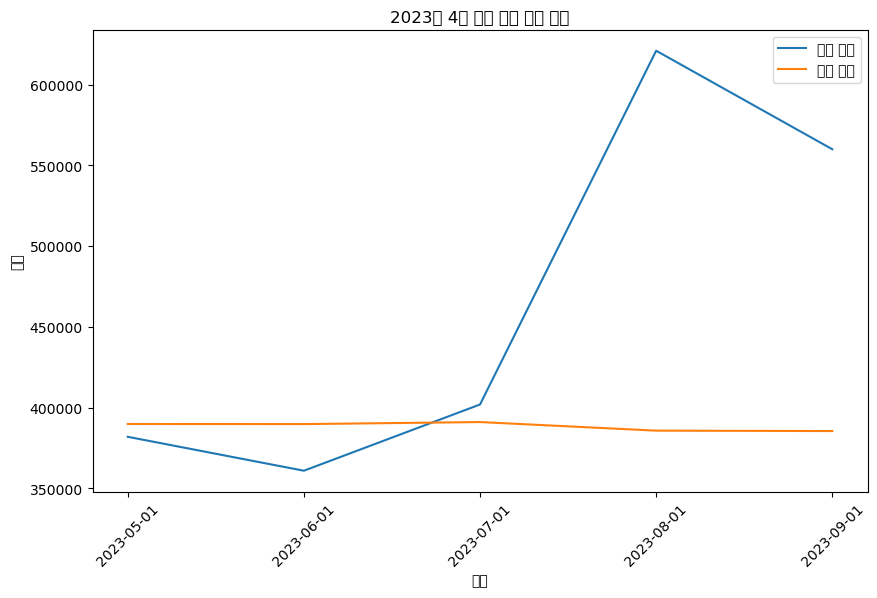

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler



# 독립 변수와 종속 변수 설정
X = data[['hot_rolled', 'pmi', 'bituminous_cola_avg']]
y = data['posco_stock']

# 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2023년 4월까지의 데이터를 학습 데이터로, 그 이후 데이터를 테스트 데이터로 구분
train_data = data[data['date'] <= '2023-04-01']
test_data = data[data['date'] > '2023-04-01']

X_train = scaler.transform(train_data[['hot_rolled', 'pmi', 'bituminous_cola_avg']])
y_train = train_data['posco_stock']
X_test = scaler.transform(test_data[['hot_rolled', 'pmi', 'bituminous_cola_avg']])
y_test = test_data['posco_stock']

# XGBoost 회귀 모델 학습
model = XGBRegressor()
model.fit(X_train, y_train)

# 테스트 데이터로 주가 예측
y_pred = model.predict(X_test)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(test_data['date'], y_test, label='실제 주가')
plt.plot(test_data['date'], y_pred, label='예측 주가')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.title('2023년 4월 이후 주가 예측 결과')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [122]:
conda list


^C

Note: you may need to restart the kernel to use updated packages.
